In [3]:
#グラフをnotebook内に描画させるための設定
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

# pandasでの表示列を増やす
# see: http://uyamazak.hatenablog.com/entry/2016/09/29/163534
pd.set_option("display.max_column", 101)

In [101]:
df_data = pd.read_csv("./kc_house_data.csv", parse_dates=['date'])

## 通常

index:0
RMSE=133967.603
MAE=72479.671
index:1
RMSE=133263.157
MAE=73298.546
index:2
RMSE=148181.587
MAE=76582.859
index:3
RMSE=128545.1
MAE=72461.074
index:4
RMSE=125475.583
MAE=70285.783


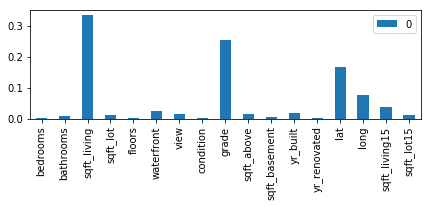

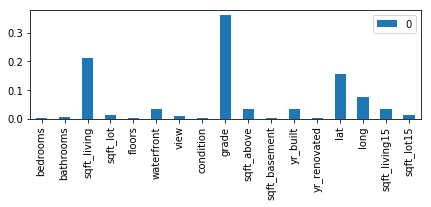

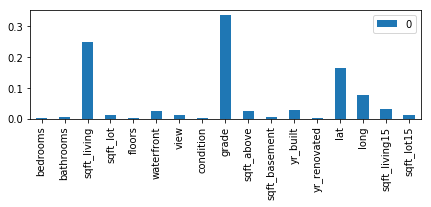

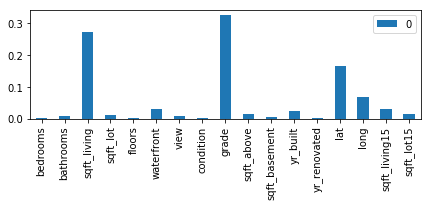

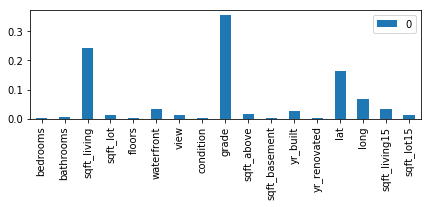

In [103]:
kf = KFold(n_splits=5, random_state=1234, shuffle=True)

for i,(train_index, test_index) in enumerate(kf.split(df_data)):
    drop_columns = ['id', 'date', 'price', 'price_log', 'zipcode']
    X = df_data.drop(columns=drop_columns).values
    y = df_data['price'].values
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr = RandomForestRegressor()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    mae = mean_absolute_error(y_test, y_pred)

    print('index:{0}'.format(i))
    # print("MSE=%s"%round(mse,3) )
    print("RMSE={0}".format(round(np.sqrt(mse), 3) ))
    print("MAE={0}".format(round(mae,3) ))
    
    pd.DataFrame(regr.feature_importances_, index=df_data.drop(columns=drop_columns).columns).plot.bar(figsize=(7,2))

## zipcodeのtarget encoding

index:0
RMSE=0.183 in exp:134834.444
MAE=0.131 exp:71968.321
index:1
RMSE=0.184 in exp:139557.754
MAE=0.132 exp:73558.954
index:2
RMSE=0.191 in exp:138746.774
MAE=0.135 exp:74324.666
index:3
RMSE=0.182 in exp:132910.627
MAE=0.132 exp:73235.32
index:4
RMSE=0.181 in exp:124281.052
MAE=0.129 exp:69488.37


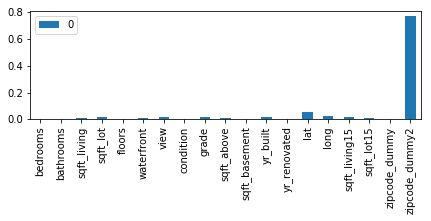

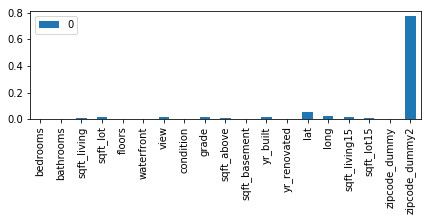

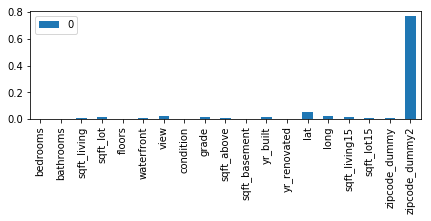

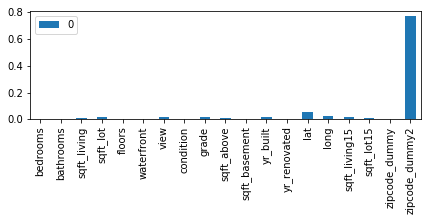

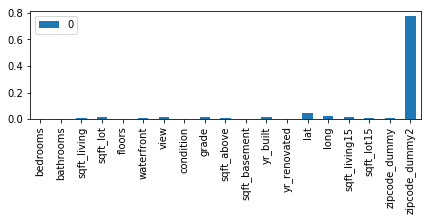

In [118]:
kf = KFold(n_splits=5, random_state=1234, shuffle=True)

df_data['price_log'] = np.log(df_data['price'])
for i,(train_index, test_index) in enumerate(kf.split(df_data)):
    df_train = df_data.iloc[train_index]
    zipcode_mean = df_train['price'].groupby(df_train['zipcode']).mean()
    df_data['zipcode_dummy'] =  [zipcode_mean[zipcode] for zipcode in df_data['zipcode']]
    df_data['zipcode_dummy2'] =  [zipcode_mean[row['zipcode']] * row['sqft_living']  for i, row in df_data.iterrows()]
    
    drop_columns = ['id', 'date', 'price', 'price_log', 'zipcode']
    X = df_data.drop(columns=drop_columns).values
    y = df_data['price_log'].values
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr = RandomForestRegressor()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    y_pred_exp = np.exp(y_pred)
    y_test_exp = np.exp(y_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_exp = mean_squared_error(y_test_exp, y_pred_exp)
    mae = mean_absolute_error(y_test, y_pred)
    mae_exp = mean_absolute_error(y_test_exp, y_pred_exp)
    print('index:{0}'.format(i))
    # print("MSE=%s"%round(mse,3) )
    print("RMSE={0} in exp:{1}".format(round(np.sqrt(mse), 3), round(np.sqrt(mse_exp), 3) ))
    print("MAE={0} exp:{1}".format(round(mae,3), round(mae_exp,3) ))
    
    pd.DataFrame(regr.feature_importances_, index=df_data.drop(columns=drop_columns).columns).plot.bar(figsize=(7,2))

## zipcodeのtarget encoding:中央値

index:0
RMSE=0.181 in exp:142487.168
MAE=0.128 exp:71029.693
index:1
RMSE=0.184 in exp:130988.388
MAE=0.131 exp:72744.415
index:2
RMSE=0.192 in exp:143706.322
MAE=0.136 exp:75529.794
index:3
RMSE=0.18 in exp:129296.923
MAE=0.13 exp:72051.076
index:4
RMSE=0.179 in exp:131741.6
MAE=0.127 exp:69363.693


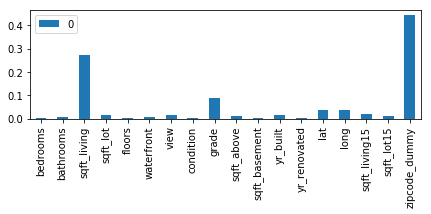

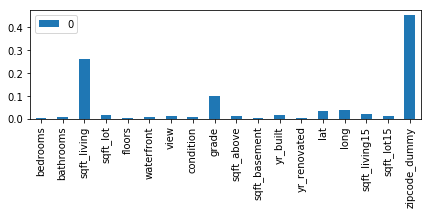

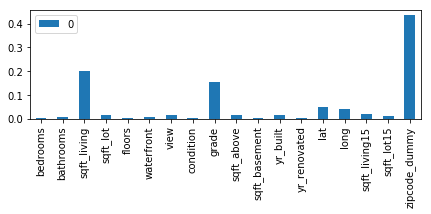

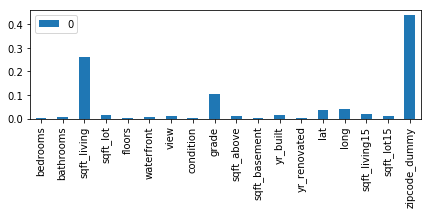

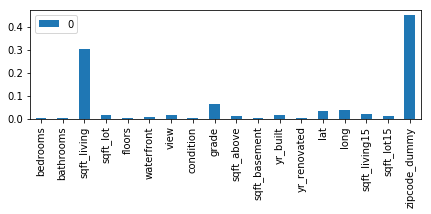

In [124]:
kf = KFold(n_splits=5, random_state=1234, shuffle=True)

df_data['price_log'] = np.log(df_data['price'])
for i,(train_index, test_index) in enumerate(kf.split(df_data)):
    df_train = df_data.iloc[train_index]
    zipcode_mean = df_train['price'].groupby(df_train['zipcode']).median()
    df_data['zipcode_dummy'] =  [zipcode_mean[zipcode] for zipcode in df_data['zipcode']]
    if 'zipcode_dummy2' in df_data.columns:
        df_data = df_data.drop(columns=['zipcode_dummy2'])
    
    drop_columns = ['id', 'date', 'price', 'price_log', 'zipcode']
    X = df_data.drop(columns=drop_columns).values
    y = df_data['price_log'].values
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr = RandomForestRegressor()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    y_pred_exp = np.exp(y_pred)
    y_test_exp = np.exp(y_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_exp = mean_squared_error(y_test_exp, y_pred_exp)
    mae = mean_absolute_error(y_test, y_pred)
    mae_exp = mean_absolute_error(y_test_exp, y_pred_exp)
    print('index:{0}'.format(i))
    # print("MSE=%s"%round(mse,3) )
    print("RMSE={0} in exp:{1}".format(round(np.sqrt(mse), 3), round(np.sqrt(mse_exp), 3) ))
    print("MAE={0} exp:{1}".format(round(mae,3), round(mae_exp,3) ))
    
    pd.DataFrame(regr.feature_importances_, index=df_data.drop(columns=drop_columns).columns).plot.bar(figsize=(7,2))

index:0
RMSE=0.184 in exp:138631.808
MAE=0.13 exp:72047.154
index:1
RMSE=0.186 in exp:137909.193
MAE=0.133 exp:73742.615
index:2
RMSE=0.191 in exp:140192.581
MAE=0.135 exp:74667.861
index:3
RMSE=0.181 in exp:129836.786
MAE=0.13 exp:71903.02
index:4
RMSE=0.18 in exp:126487.629
MAE=0.129 exp:69852.703


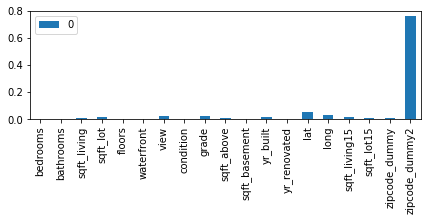

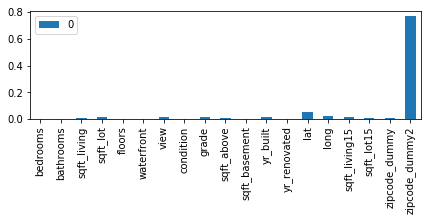

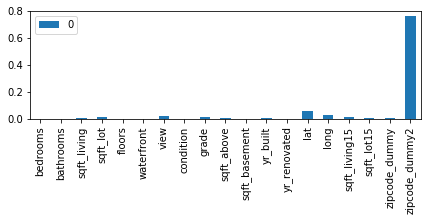

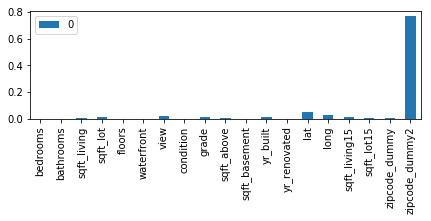

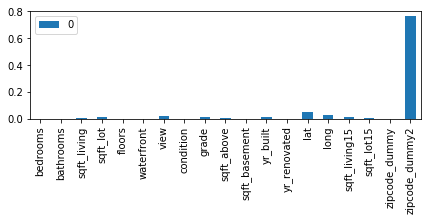

In [125]:
kf = KFold(n_splits=5, random_state=1234, shuffle=True)

df_data['price_log'] = np.log(df_data['price'])
for i,(train_index, test_index) in enumerate(kf.split(df_data)):
    df_train = df_data.iloc[train_index]
    zipcode_mean = df_train['price'].groupby(df_train['zipcode']).median()
    df_data['zipcode_dummy'] =  [zipcode_mean[zipcode] for zipcode in df_data['zipcode']]
    df_data['zipcode_dummy2'] =  [zipcode_mean[row['zipcode']] * row['sqft_living']  for i, row in df_data.iterrows()]
    
    drop_columns = ['id', 'date', 'price', 'price_log', 'zipcode']
    X = df_data.drop(columns=drop_columns).values
    y = df_data['price_log'].values
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr = RandomForestRegressor()
    regr.fit(X_train, y_train)
    
    y_pred = regr.predict(X_test)
    y_pred_exp = np.exp(y_pred)
    y_test_exp = np.exp(y_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_exp = mean_squared_error(y_test_exp, y_pred_exp)
    mae = mean_absolute_error(y_test, y_pred)
    mae_exp = mean_absolute_error(y_test_exp, y_pred_exp)
    print('index:{0}'.format(i))
    # print("MSE=%s"%round(mse,3) )
    print("RMSE={0} in exp:{1}".format(round(np.sqrt(mse), 3), round(np.sqrt(mse_exp), 3) ))
    print("MAE={0} exp:{1}".format(round(mae,3), round(mae_exp,3) ))
    
    pd.DataFrame(regr.feature_importances_, index=df_data.drop(columns=drop_columns).columns).plot.bar(figsize=(7,2))